Ex 4.8 Grouping Data and Aggregating Variables

This script contains the following:
1. Import Libraries
2. Create Path
3. Import Data
4. Task 2: Grouping Data : Find aggregated mean for "order_number" column, grouped by "department_id"
5. Task 4: Create Loyalty Flag using transform() and loc() functions
6. Task 5: Identify the spending habits for Loyal, Regular and New Customers
7. Task 6: Create spending flag based on average price
8. Task 7: Determine frequent vs. non-frequent customers
9. Export DataFrame as .pkl file to Prepared Data folder

1.***Import Libraries***

In [81]:
import pandas as pd
import numpy as np
import os
import seaborn as sns

2.***Create Path***

In [15]:
path=r'C:\Users\lisac\10-10-2024 Instacart Basket Analysis'

3.***Import Data***

In [17]:
ords_prods_merge=pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_merge_updated.pkl'))

4.***Task 2: Grouping Data: find the aggregated mean for "order_number" column, grouped by "department_id"***

In [19]:
#Defining dataframe
orders_products_merge_updated=ords_prods_merge

In [20]:
#Checking shape of dataframe
ords_prods_merge.shape

(32404859, 19)

In [21]:
#Using groupby() function
ords_prods_merge.groupby('product_name')

Observation:  correctly split the data into groups, based on the output "object"

In [23]:
#Performing aggregation mean, on the order_number column, grouped by the department_id:
ords_prods_merge.groupby('department_id').agg({'order_number':['mean', 'min', 'max']})

order_number        
                      mean min max
department_id                     
1                15.457838   1  99
2                17.277920   1  99
3                17.170395   1  99
4                17.811403   1  99
5                15.215751   1  99
6                16.439806   1  99
7                17.225802   1  99
8                15.340650   1  99
9                15.895474   1  99
10               20.197148   1  99
11               16.170638   1  99
12               15.887671   1  99
13               16.583536   1  99
14               16.773669   1  99
15               16.165037   1  99
16               17.665606   1  99
17               15.694469   1  99
18               19.310397   1  99
19               17.177343   1  99
20               16.473447   1  99
21               22.902379   1  99

Observation (Task 3):  How do the results for the entire dataframe differ from those of the subset?  The results from the entire dataframe are 
slightly higher than the results from the subset.  For example, the mean of dept_id 1 from the list above is 15.46; however, on the subset, it's 14.80.
This tracks as the mean was calulated on the entire dataframe, not just a subset.

5.***Task 4: Create Loyalty Flag using transform() and loc() functions***

In [26]:
#Create a new column, "max_order", to contain the max frequency of the "order_number" column
ords_prods_merge['max_order']=ords_prods_merge.groupby(['customer_id'])['order_number'].transform('max')

In [27]:
#Checking the creation of "max_order" column
ords_prods_merge.head(20)

order_id  customer_id  order_number  order_hour_of_day  \
0    2539329            1             1                  8   
1    2539329            1             1                  8   
2    2539329            1             1                  8   
3    2539329            1             1                  8   
4    2539329            1             1                  8   
5    2398795            1             2                  7   
6    2398795            1             2                  7   
7    2398795            1             2                  7   
8    2398795            1             2                  7   
9    2398795            1             2                  7   
10   2398795            1             2                  7   
11    473747            1             3                 12   
12    473747            1             3                 12   
13    473747            1             3                 12   
14    473747            1             3                 12   
15    473747            1             3                 12   
16   2254736            1             4                  7   
17   2254736            1             4                  7   
18   2254736            1             4                  7   
19   2254736            1             4                  7   

    days_since_prior_order order_day_of_week_name  is_first_order  product_id  \
0                      0.0                Tuesday               1         196   
1                      0.0                Tuesday               1       14084   
2                      0.0                Tuesday               1       12427   
3                      0.0                Tuesday               1       26088   
4                      0.0                Tuesday               1       26405   
5                     15.0              Wednesday               0         196   
6                     15.0              Wednesday               0       10258   
7                     15.0              Wednesday               0       12427   
8                     15.0              Wednesday               0       13176   
9                     15.0              Wednesday               0       26088   
10                    15.0              Wednesday               0       13032   
11                    21.0              Wednesday               0         196   
12                    21.0              Wednesday               0       12427   
13                    21.0              Wednesday               0       10258   
14                    21.0              Wednesday               0       25133   
15                    21.0              Wednesday               0       30450   
16                    29.0               Thursday               0         196   
17                    29.0               Thursday               0       12427   
18                    29.0               Thursday               0       10258   
19                    29.0               Thursday               0       25133   

    add_to_cart_order  reordered _merge  \
0                   1          0   both   
1                   2          0   both   
2                   3          0   both   
3                   4          0   both   
4                   5          0   both   
5                   1          1   both   
6                   2          0   both   
7                   3          1   both   
8                   4          0   both   
9                   5          1   both   
10                  6          0   both   
11                  1          1   both   
12                  2          1   both   
13                  3          1   both   
14                  4          0   both   
15                  5          0   both   
16                  1          1   both   
17                  2          1   both   
18                  3          1   both   
19                  4          1   both   

                               product_name  aisle_id  department_id  prices  \
0              

Observation: The new "max_order" column has appeared.  From the reading, it was noted that each discrete value within the "max_order" column 
will appear in the dataframe the same number of times as its value.  Therefore, if the maximum order is 10, then that "10" will appear within the 
dataframe ten times.  

In [29]:
#Using the .head() function to get a better insight into the accuracy of the new column
ords_prods_merge.head(100)

order_id  customer_id  order_number  order_hour_of_day  \
0    2539329            1             1                  8   
1    2539329            1             1                  8   
2    2539329            1             1                  8   
3    2539329            1             1                  8   
4    2539329            1             1                  8   
..       ...          ...           ...                ...   
95    738281            2             4                 10   
96   1673511            2             5                 11   
97   1673511            2             5                 11   
98   1673511            2             5                 11   
99   1673511            2             5                 11   

    days_since_prior_order order_day_of_week_name  is_first_order  product_id  \
0                      0.0                Tuesday               1         196   
1                      0.0                Tuesday               1       14084   
2                      0.0                Tuesday               1       12427   
3                      0.0                Tuesday               1       26088   
4                      0.0                Tuesday               1       26405   
..                     ...                    ...             ...         ...   
95                     8.0                Tuesday               0       21150   
96                     8.0              Wednesday               0       47144   
97                     8.0              Wednesday               0        5322   
98                     8.0              Wednesday               0       17224   
99                     8.0              Wednesday               0       38656   

    add_to_cart_order  reordered _merge  \
0                   1          0   both   
1                   2          0   both   
2                   3          0   both   
3                   4          0   both   
4                   5          0   both   
..                ...        ...    ...   
95                 13          0   both   
96                  1          0   both   
97                  2          0   both   
98                  3          0   both   
99                  4          0   both   

                                         product_name  aisle_id  \
0                                                Soda        77   
1             Organic Unsweetened Vanilla Almond Milk        91   
2                                 Original Beef Jerky        23   
3                          Aged White Cheddar Popcorn        23   
4                    XL Pick-A-Size Paper Towel Rolls        54   
..                                                ...       ...   
95                            Fire Grilled Steak Bowl        38   
96     Unsweetened Original Almond Breeze Almond Milk        91   
97  Gluten Free Dark Chocolate Chunk Chewy with a ...         3   
98                   Oats & Honey Gluten Free Granola         3   
99  Gluten Free Peanut Butter Dark Chocolate Chewy...         3   

    department_id  prices    price_range_loc          Busiest_Day  \
0               7     9.0                NaN  Regularly Busy Days   
1              16    12.5                NaN  Regularly Busy Days   
2              19     4.4  Low-Range Product  Regularly Busy Days   
3              19     4.7  Low-Range Product  Regularly Busy Days   
4              17     1.0  Low-Range Product  Regularly Busy Days   
..            ...     ...                ...                  ...   
95              1     5.9                NaN  Regularly Busy Days   
96             16    14.0                NaN   Least Busiest Days   
97             19     2.9  Low-Range Product   Least Busiest Days   
98             19     1.6  Low-Range Product   Least Busiest Days   
99             19     3.4  Low-Range Product   Least Busiest Days   

           Busiest_Days Busiest_Period_of_Day  max_order  
0   Regularly Busy Days        Average_Orders         10  
1   Regularly Bus

Observation:  Limitations with Jupyter's display option only prints with top 5 and bottom 5 rows.  Will issue command that will not assign options
regarding the maximum number of rows to display.

In [31]:
pd.options.display.max_rows=None

In [32]:
#Re-running the .head to check first 100 rows displayed
ords_prods_merge.head(100)

order_id  customer_id  order_number  order_hour_of_day  \
0    2539329            1             1                  8   
1    2539329            1             1                  8   
2    2539329            1             1                  8   
3    2539329            1             1                  8   
4    2539329            1             1                  8   
5    2398795            1             2                  7   
6    2398795            1             2                  7   
7    2398795            1             2                  7   
8    2398795            1             2                  7   
9    2398795            1             2                  7   
10   2398795            1             2                  7   
11    473747            1             3                 12   
12    473747            1             3                 12   
13    473747            1             3                 12   
14    473747            1             3                 12   
15    473747            1             3                 12   
16   2254736            1             4                  7   
17   2254736            1             4                  7   
18   2254736            1             4                  7   
19   2254736            1             4                  7   
20   2254736            1             4                  7   
21    431534            1             5                 15   
22    431534            1             5                 15   
23    431534            1             5                 15   
24    431534            1             5                 15   
25    431534            1             5                 15   
26    431534            1             5                 15   
27    431534            1             5                 15   
28    431534            1             5                 15   
29   3367565            1             6                  7   
30   3367565            1             6                  7   
31   3367565            1             6                  7   
32   3367565            1             6                  7   
33    550135            1             7                  9   
34    550135            1             7                  9   
35    550135            1             7                  9   
36    550135            1             7                  9   
37    550135            1             7                  9   
38   3108588            1             8                 14   
39   3108588            1             8                 14   
40   3108588            1             8                 14   
41   3108588            1             8                 14   
42   3108588            1             8                 14   
43   3108588            1             8                 14   
44   2295261            1             9                 16   
45   2295261            1             9                 16   
46   2295261            1             9                 16   
47   2295261            1             9                 16   
48   2295261            1             9                 16   
49   2295261            1             9                 16   
50   2550362            1            10                  8   
51   2550362            1            10                  8   
52   2550362            1            10                  8   
53   2550362            1            10                  8   
54   2550362            1            10                  8   
55   2550362            1            10                  8   
56   2550362            1            10                  8   
57   2550362            1            10                  8   
58   2550362            1            10                  8   
59   2168274            2             1                 11   
60   2168274            2             1                 11   
61   2168274            2             1                 11   
62   2168274            2             1                 11   
63   2168274            2           

Observation: "Eyeballed" the order_number column and there are 10 orders and the max_order column has 10 orders listed.

5.***Task 4: Create Loyalty Flag using transform() and loc() functions***

In [35]:
ords_prods_merge.loc[ords_prods_merge['max_order']>40, 'loyalty_flag']='Loyal Customer'

In [36]:
ords_prods_merge.loc[(ords_prods_merge['max_order']<=40)&(ords_prods_merge['max_order']>10), 'loyalty_flag']='Regular Customer'

In [37]:
ords_prods_merge.loc[ords_prods_merge['max_order']<=10, 'loyalty_flag']='New Customer'

In [38]:
#Printing the frequency of new "loyalty_flag" column
ords_prods_merge['loyalty_flag'].value_counts(dropna=False)

loyalty_flag
Regular Customer    15876776
Loyal Customer      10284093
New Customer         6243990
Name: count, dtype: int64

Observation: The majority of the customers fall into the "Regular Customer" category.

In [40]:
#Checking for correct interpretation of the "loyalty_flag" column
ords_prods_merge[['customer_id', 'loyalty_flag', 'order_number']].head(100)

customer_id      loyalty_flag  order_number
0             1      New Customer             1
1             1      New Customer             1
2             1      New Customer             1
3             1      New Customer             1
4             1      New Customer             1
5             1      New Customer             2
6             1      New Customer             2
7             1      New Customer             2
8             1      New Customer             2
9             1      New Customer             2
10            1      New Customer             2
11            1      New Customer             3
12            1      New Customer             3
13            1      New Customer             3
14            1      New Customer             3
15            1      New Customer             3
16            1      New Customer             4
17            1      New Customer             4
18            1      New Customer             4
19            1      New Customer             4
20            1      New Customer             4
21            1      New Customer             5
22            1      New Customer             5
23            1      New Customer             5
24            1      New Customer             5
25            1      New Customer             5
26            1      New Customer             5
27            1      New Customer             5
28            1      New Customer             5
29            1      New Customer             6
30            1      New Customer             6
31            1      New Customer             6
32            1      New Customer             6
33            1      New Customer             7
34            1      New Customer             7
35            1      New Customer             7
36            1      New Customer             7
37            1      New Customer             7
38            1      New Customer             8
39            1      New Customer             8
40            1      New Customer             8
41            1      New Customer             8
42            1      New Customer             8
43            1      New Customer             8
44            1      New Customer             9
45            1      New Customer             9
46            1      New Customer             9
47            1      New Customer             9
48            1      New Customer             9
49            1      New Customer             9
50            1      New Customer            10
51            1      New Customer            10
52            1      New Customer            10
53            1      New Customer            10
54            1      New Customer            10
55            1      New Customer            10
56            1      New Customer            10
57            1      New Customer            10
58            1      New Customer            10
59            2  Regular Customer             1
60            2  Regular Customer             1
61            2  Regular Customer             1
62            2  Regular Customer             1
63            2  Regular Customer             1
64            2  Regular Customer             1
65            2  Regular Customer             1
66            2  Regular Customer             1
67            2  Regular Customer             1
68            2  Regular Customer             1
69            2  Regular Customer             1
70            2  Regular Customer             1
71            2  Regular Customer             1
72            2  Regular Customer             2
73            2  Regular Customer             2
74            2  Regular Customer             2
75            2  Regular Customer             2
76            2  Regular Customer             2
77            2  Regular Customer             2
78            2  Regular Customer             3
79            2  Regular Customer             3
80            2  Regular Customer             3
81            2  Regular Customer             3
82            2  Reg

Observation:  "Loyalty_flag" column is indicated along with the customer_id and order_number columns.

6.***Task 5: Identify the spending habits for Loyal, Regular and New Customers***

In [43]:
#Checking the basic statistics of the prices for each loyalty category (Loyal, Regualar, New)
ords_prods_merge.groupby('loyalty_flag').agg({'prices' : ['mean', 'min', 'max']})

prices              
                       mean  min      max
loyalty_flag                             
Loyal Customer    10.386336  1.0  99999.0
New Customer      13.294670  1.0  99999.0
Regular Customer  12.495717  1.0  99999.0

Observation:  The average product price for loyal customers is approximate 10.39 (lowest).  For  new  customers, it's 13.29 (highest).  Although loyal customers are spending less, on an average of 2.91, loyal customers are ordering  more often. About 4 times as often as new customers.  The min and max look in line with what I'd expect.  The minimum order is always one.  The maximum average for each category is listed at 99,999.  This could be place holders in the products dataframe that didn't match up with the orders dataframe.

7.***Task 6: Create spending flag based on average price***

In [46]:
#Aggregating Data with transform() Function
ords_prods_merge['avg_product_price']=ords_prods_merge.groupby(['customer_id'])['prices'].transform('mean')

In [47]:
#Checking the creation of "avg_product_price" column
ords_prods_merge.head(5)

order_id  customer_id  order_number  order_hour_of_day  \
0   2539329            1             1                  8   
1   2539329            1             1                  8   
2   2539329            1             1                  8   
3   2539329            1             1                  8   
4   2539329            1             1                  8   

   days_since_prior_order order_day_of_week_name  is_first_order  product_id  \
0                     0.0                Tuesday               1         196   
1                     0.0                Tuesday               1       14084   
2                     0.0                Tuesday               1       12427   
3                     0.0                Tuesday               1       26088   
4                     0.0                Tuesday               1       26405   

   add_to_cart_order  reordered  ... aisle_id department_id  prices  \
0                  1          0  ...       77             7     9.0   
1                  2          0  ...       91            16    12.5   
2                  3          0  ...       23            19     4.4   
3                  4          0  ...       23            19     4.7   
4                  5          0  ...       54            17     1.0   

     price_range_loc          Busiest_Day         Busiest_Days  \
0                NaN  Regularly Busy Days  Regularly Busy Days   
1                NaN  Regularly Busy Days  Regularly Busy Days   
2  Low-Range Product  Regularly Busy Days  Regularly Busy Days   
3  Low-Range Product  Regularly Busy Days  Regularly Busy Days   
4  Low-Range Product  Regularly Busy Days  Regularly Busy Days   

  Busiest_Period_of_Day max_order  loyalty_flag  avg_product_price  
0        Average_Orders        10  New Customer           6.367797  
1        Average_Orders        10  New Customer           6.367797  
2        Average_Orders        10  New Customer           6.367797  
3        Average_Orders        10  New Customer           6.367797  
4        Average_Orders        10  New Customer           6.367797  

[5 rows x 22 columns]

Observation:  Average Product Price column created!  

In [49]:
#Creating spend flag : Low or high spender, based on avaerage product price
ords_prods_merge.loc[ords_prods_merge['avg_product_price']<10, 'spend_flag']='Low Spender'

In [50]:
ords_prods_merge.loc[(ords_prods_merge['avg_product_price']>=10), 'spend_flag']='High Spender'

In [51]:
#Printing the frequency of new "spend_flag" column
ords_prods_merge['spend_flag'].value_counts(dropna=False)

spend_flag
Low Spender     31770614
High Spender      634245
Name: count, dtype: int64

Observation:  There are over 600,000 high spenders and more than 32 million low spenders

In [53]:
#Checking for correct interpretation of the "loyalty_flag" column
ords_prods_merge[['customer_id', 'spend_flag', 'avg_product_price']].head(10)

customer_id   spend_flag  avg_product_price
0            1  Low Spender           6.367797
1            1  Low Spender           6.367797
2            1  Low Spender           6.367797
3            1  Low Spender           6.367797
4            1  Low Spender           6.367797
5            1  Low Spender           6.367797
6            1  Low Spender           6.367797
7            1  Low Spender           6.367797
8            1  Low Spender           6.367797
9            1  Low Spender           6.367797

Observation:  Average product price lower than 10 is correctly indicated as Low Spender

8.***Task 7: Determine frequent vs. non-frequent customers***

In [56]:
#Group by customer_id and calculate the average (median) of "days_since_prior_order"
ords_prods_merge['avg_days_between_orders'] = ords_prods_merge.groupby('customer_id')['days_since_prior_order'].transform('median')

In [57]:
#Checking the creation of "avg_days_between_orders" column
ords_prods_merge.head(5)

order_id  customer_id  order_number  order_hour_of_day  \
0   2539329            1             1                  8   
1   2539329            1             1                  8   
2   2539329            1             1                  8   
3   2539329            1             1                  8   
4   2539329            1             1                  8   

   days_since_prior_order order_day_of_week_name  is_first_order  product_id  \
0                     0.0                Tuesday               1         196   
1                     0.0                Tuesday               1       14084   
2                     0.0                Tuesday               1       12427   
3                     0.0                Tuesday               1       26088   
4                     0.0                Tuesday               1       26405   

   add_to_cart_order  reordered  ... prices    price_range_loc  \
0                  1          0  ...    9.0                NaN   
1                  2          0  ...   12.5                NaN   
2                  3          0  ...    4.4  Low-Range Product   
3                  4          0  ...    4.7  Low-Range Product   
4                  5          0  ...    1.0  Low-Range Product   

           Busiest_Day         Busiest_Days  Busiest_Period_of_Day max_order  \
0  Regularly Busy Days  Regularly Busy Days         Average_Orders        10   
1  Regularly Busy Days  Regularly Busy Days         Average_Orders        10   
2  Regularly Busy Days  Regularly Busy Days         Average_Orders        10   
3  Regularly Busy Days  Regularly Busy Days         Average_Orders        10   
4  Regularly Busy Days  Regularly Busy Days         Average_Orders        10   

   loyalty_flag avg_product_price   spend_flag  avg_days_between_orders  
0  New Customer          6.367797  Low Spender                     20.0  
1  New Customer          6.367797  Low Spender                     20.0  
2  New Customer          6.367797  Low Spender                     20.0  
3  New Customer          6.367797  Low Spender                     20.0  
4  New Customer          6.367797  Low Spender                     20.0  

[5 rows x 24 columns]

Observation:  Column "average_days_between_orders" is there!

In [59]:
#Creating order frequency flag:  Frequent vs. Non-Frequent customer
ords_prods_merge.loc[ords_prods_merge['avg_days_between_orders']>20, 'order_frequency_flag']='Non-Frequent Customer'

In [60]:
ords_prods_merge.loc[(ords_prods_merge['avg_days_between_orders']>10)&(ords_prods_merge['avg_days_between_orders']<=20), 'order_frequency_flag']='Regular Customer'

In [61]:
ords_prods_merge.loc[ords_prods_merge['avg_days_between_orders']<=10, 'order_frequency_flag']='Fequent Customer'

In [62]:
#Printing the frequency of new "order_frequency_flag" column
ords_prods_merge['order_frequency_flag'].value_counts(dropna=False)

order_frequency_flag
Fequent Customer         22796659
Regular Customer          6921472
Non-Frequent Customer     2686728
Name: count, dtype: int64

Observation:  As expected, there are roughly 23 million frequent customers, 7 million regular customers and just about 3 million non-frequent customers.

In [64]:
#Checking for correct interpretation of the "order_frequency_flag" column
ords_prods_merge[['customer_id', 'order_frequency_flag', 'avg_days_between_orders']].head(5)

customer_id order_frequency_flag  avg_days_between_orders
0            1     Regular Customer                     20.0
1            1     Regular Customer                     20.0
2            1     Regular Customer                     20.0
3            1     Regular Customer                     20.0
4            1     Regular Customer                     20.0

8.5. ***Perform some exploratory statistical checks on some extreeme values***

In [67]:
#Running data consistency checks to figure out why the histogram is just one column
ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

Observation:  The max value is 99,9999 dollars.  That means that there is a product that costs $99,999.  Not very likely.

In [69]:
#Run .mean(), .median(), .max() statistic checks
ords_prods_merge['prices'].mean()

11.980225638383445

In [71]:
ords_prods_merge['prices'].median()

7.4

In [73]:
ords_prods_merge['prices'].max()

99999.0

Observation:  running each statistic individually will allow a closer look at the numbers.  The average price is 11.98, the median price is 7.40 
and the max price is 99,999.  The reading indicates that this number is a result of data corruption or some kind of special value within the data. 
However, I did inquire with my tutor on this.  We came to the conclusion that this number and other higher numbers like it could be placeholders from when I merged both the orders and products dataframes.  Having values between 7 and 12 are relatively realistic, but the max value of 99,999 is throwing off the results. 

In [75]:
#Checking the price column
ords_prods_merge[ords_prods_merge['prices']>1000]

order_id  customer_id  order_number  order_hour_of_day  \
1576        912404           17            12                 14   
1638        603376           17            22                 16   
16522      3264360          135             2                 21   
16528       892534          135             3                  8   
53672       229704          342             8                 19   
91430      2856927          618             2                 12   
91460      1871776          618             3                 13   
98762      2575782          658            19                 15   
98800       642211          658            21                 17   
98980       591140          658            30                 10   
99030      1116834          658            32                 21   
122849      260601          846             2                 11   
127212      573149          866             4                 14   
127231     2589688          866             5                 12   
127250      525880          866             6                 11   
127262      265986          866             7                  9   
127278     2920240          866             8                 10   
127287      500920          866             9                 12   
127313     1457337          866            10                 14   
127325     1916506          866            11                 15   
127365     1258862          866            12                 11   
127388     2881244          866            13                 15   
127417      379654          866            14                 11   
128911      183964          873             3                 10   
128924     1851256          873             4                 12   
136836      156071          917             7                 22   
136865     2884554          917             8                 20   
136885     1983147          917             9                 17   
136920        3245          917            11                  9   
137044     2772015          917            16                 12   
137118     1209345          917            19                 17   
142302     1496387          962             5                 20   
156000     3376430         1032             1                 12   
156038     2309971         1032             3                 11   
157449     1303175         1040             3                 14   
172029      694349         1162             9                 16   
181571     2606341         1227             2                 17   
191245     2920834         1284             8                  8   
191268      280039         1284             9                  8   
221613     1435153         1519            26                 11   
221710     1066435         1519            32                 10   
250278     1234215         1702             6                 17   
250330      618635         1702            10                 14   
273994      223891         1829             6                 17   
282631      682835         1875             2                 15   
284218     1915696         1893             1                 17   
284229     2763293         1893             2                 16   
284252     2564805         1893             4                 17   
289857     3242848         1941             4                 11   
290204     2224211         1941            25                 15   
307363      422540         2056             6                 20   
360926     1697208         2409            33                 19   
371481      579854         2466             7                 13   
409993     2716179         2700             7                  7   
418613      461261         2768            10                  9   
426987     2699729         2823             1                 17   
459750      298222         3067            30                 10   
465704      747821         3117            12                 17  

Observation: There are too may columns (25) to scroll through to see the prices column, so I'm going to only look at the prices column

In [76]:
#Checking boolean values greater than 1,000
ords_prods_merge[ords_prods_merge['prices'] > 1000]['prices'].value_counts()

prices
14900.0    4429
99999.0     698
Name: count, dtype: int64

<Axes: xlabel='prices', ylabel='prices'>

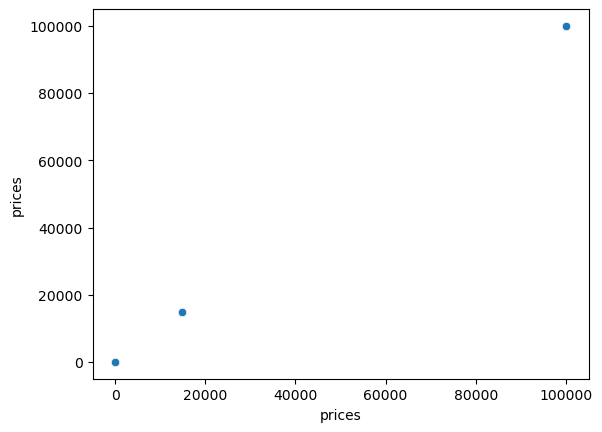

In [83]:
#Creating a scatterplot to look at the distribution of the prices column against itself
sns.scatterplot(x='prices', y='prices', data=ords_prods_merge)

Observation: I think there's too much data for my machine to process.  Instead of plotting all the data, I'll take a random sample.

In [91]:
#Creating a scatterplot to look at the distribution of the prices column against itself, using only random set of 10,000 rows
sampled_data = ords_prods_merge.sample(n=10000, random_state=42)

<Axes: xlabel='prices', ylabel='prices'>

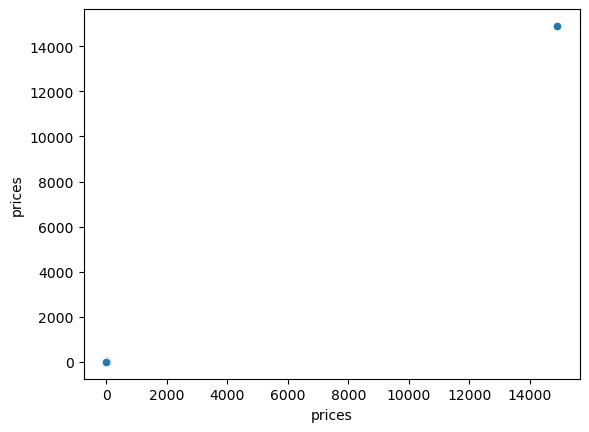

In [92]:
#Plot the scatterplot using the sample
sns.scatterplot(x='prices', y='prices', data=sampled_data)

Observation:  I've got two plotted points; one at zero-ish and another at roughly 14,000.  The random selection didn't capture the 99,999 values.

In [93]:
#Marking the outliers as Nan values so they don't skew the final results
ords_prods_merge.loc[ords_prods_merge['prices']>100, 'prices']=np.nan

In [94]:
#Checking to make sure the maximum values are not higher than 100 in the prices column
ords_prods_merge['prices'].max()

25.0

9.***Export DataFrame as .pkl file to Prepared Data folder***

In [99]:
ords_prods_merge.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_merge_grouped.pkl'))